### 參考
https://blog.csdn.net/hustqb/article/details/80628721

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets

digits = datasets.load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape

'''顯示原始數據'''
n = 20
img = np.zeros((10*n, 10*n))
for i in range(n):
    ix = 10*i +1
    for j in range(n):
        iy = 10*j +1
        img[ix:ix+8, iy:iy+8] = X[i*n+j].reshape((8,8))

plt.figure(figsize=(8,8))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

Dimension of original data is 64.Dimension of embedded data is 2


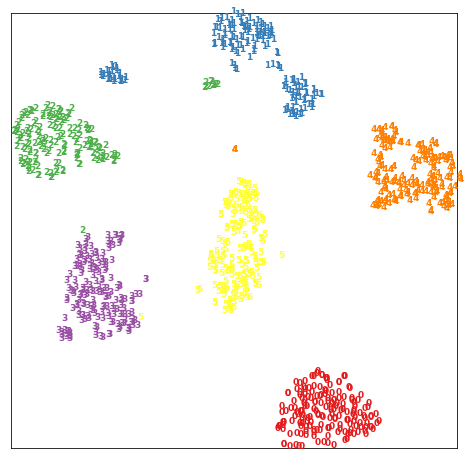

In [2]:
'''t-SNE'''
tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
X_tsne = tsne.fit_transform(X)

print("Dimension of original data is {}."
      "Dimension of embedded data is {}".format(X.shape[-1], X_tsne.shape[-1]))

'''嵌入空間視覺化'''
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)
plt.figure(figsize=(8,8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color=plt.cm.Set1(y[i]),
             fontdict={'weight':'bold','size':9})

plt.xticks([])
plt.yticks([])
plt.show()